there is only one way to calculate minimum of loss function is by gradient descent 

<img src="../images/lggd (2).png">
<img src="../images/lggd (4).png">
<img src="../images/lggd (5).png">
<img src="../images/lggd (6).png">
<img src="../images/lggd (1).png">
<img src="../images/lggd (8).png">
<img src="../images/lggd (9).png">
<img src="../images/lggd (10).png">
<img src="../images/lggd (7).png">

in each epoch we update our w as
w=w+dl/dw   # where l is loss function and w are weights

on solving it we get dl/dw=-(Y@X)/m # where m is the no of rows

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=100,n_features=2,n_clusters_per_class=1,n_informative=1,n_redundant=0,random_state=42)
y

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

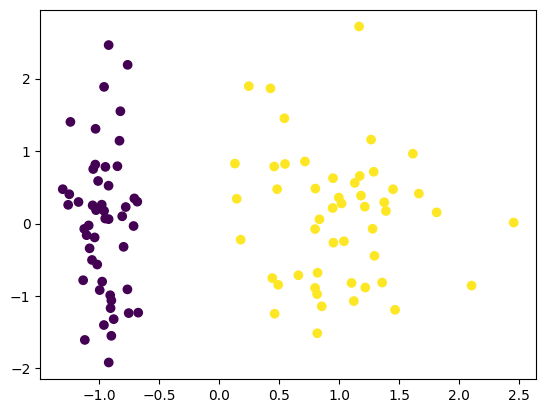

In [4]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
class logisticGD:
    def __init__(self,lr,epochs):
        self.lr=lr
        self.epochs=epochs
        self.weights=None

    def activateSigmoid(self,i):
        return 1/(1+np.exp(i))

    def activate(self,i):
        return 1 if i>0.5 else 0
        
    def fit(self,X,y):
        X=np.insert(X,0,1,axis=1)
        
        self.weights=np.ones(X.shape[1])
        print(self.weights)
        for i in range(self.epochs):
            
            y_hat=[self.activateSigmoid(i) for i in X @ self.weights]

            self.weights=self.weights + self.lr/(X.shape[0]-1) * ( ( y - y_hat ).T @  X ).T

        print(self.weights)
        return self.weights
        
    def predict(self,X):
        X=np.insert(X,0,1,axis=1)
        return [ self.activate(i)  for i in X @ self.weights ]

In [8]:
pr=logisticGD(0.01,3000)
wts=pr.fit(X_train,y_train)
y_pred=pr.predict(X_test)

[1. 1. 1.]
[ 3.84429806 29.55044156  2.65005957]


[np.float64(2.3010903321485516), np.float64(11.532308964613142), np.float64(0.6561727368290832)]


C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


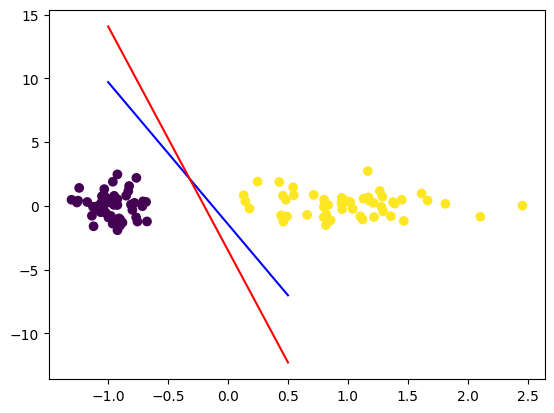

In [9]:
# comparision between our and sklearns line 

x=np.linspace(-1,0.5,100)

# w0+w1x+w2y=0

coef=-wts[1]/wts[2]
intercept=-wts[0]/wts[2]
plt.plot(x,x * coef +intercept,"b-")
plt.scatter(x=X[:,0],y=X[:,1],c=y)

from sklearn.linear_model import LogisticRegression

reg=LogisticRegression(penalty=None , solver="sag")

reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)

x=np.linspace(-1,0.5,100)

wts=[i for i in reg.intercept_]+[j for i in reg.coef_ for j in i]

print(wts)
coef=-wts[1]/wts[2]
intercept=-wts[0]/wts[2]
plt.plot(x,x * coef +intercept,"r-")

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

1.0